In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('sales_discounts.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
df.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


In [6]:
numerical = df.select_dtypes(include = np.number)

In [7]:
numerical.mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [8]:
df.groupby('Volume')['Discount Amount'].agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Volume,,,,
1,1755.271350,492.422165,5739.449195,69.177942
2,3050.877510,629.326353,11739.813979,94.682735
3,3959.500976,989.931618,17900.983733,131.739007
4,2015.373231,851.601400,16892.520951,175.041899
5,2793.206285,1535.261931,9199.719313,224.990564
6,3517.750882,1919.767863,10240.732326,286.058514
7,4841.828710,2435.394913,12734.009012,320.132172
8,1676.876296,618.346566,9262.677273,389.313617
9,4838.997694,781.259494,15214.643324,566.957868


In [9]:
mean_volume = df.Volume.mean()
mean_volume

5.066666666666666

In [10]:
N= len(df['Volume'])
N

450

In [11]:
#Standard Deviation
std = numerical.std()
std

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

### Data Visualization

In [13]:
cataegorical = df.select_dtypes(include=['object']).columns
cataegorical

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

C:\Users\2002g\AppData\Local\Temp\ipykernel_11228\1954544972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


Text(0, 0.5, 'Count')

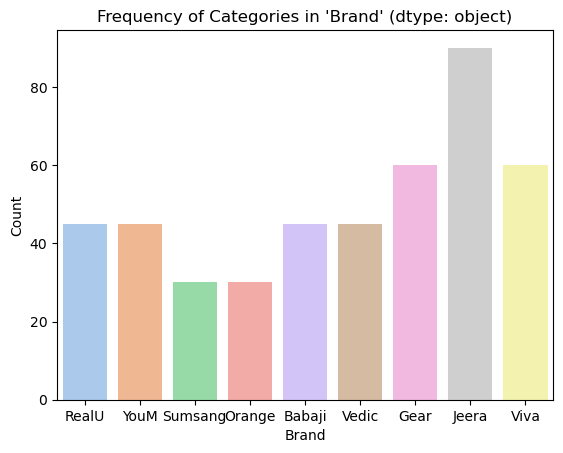

In [14]:
col = 'Brand'
sns.countplot(data=df, x=col, palette='pastel')
plt.title(f"Frequency of Categories in '{col}' (dtype: object)")
plt.xlabel(col)
plt.ylabel("Count")

Text(0.5, 1.0, 'Boxplot of Volume')

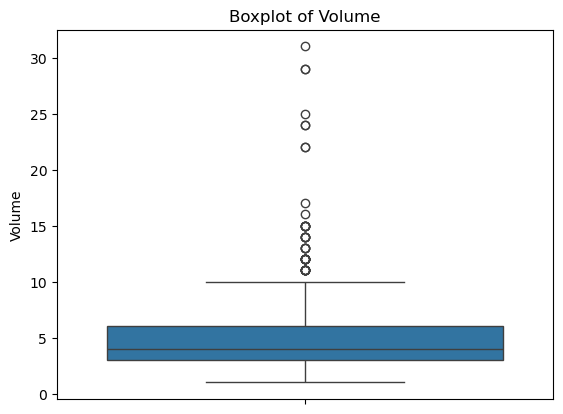

In [15]:
sns.boxplot(data = df, y = 'Volume')
plt.title('Boxplot of Volume')

In [16]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
extreme_value= Q3 + 1.5 * IQR
extreme_value

10.5

Text(0.5, 1.0, 'Unusual Distribution')

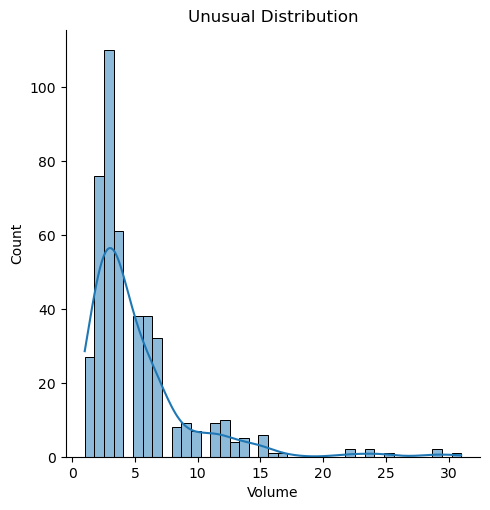

In [17]:
sns.displot(df['Volume'], kde = True)
plt.title('Unusual Distribution')

<Axes: xlabel='Volume', ylabel='Density'>

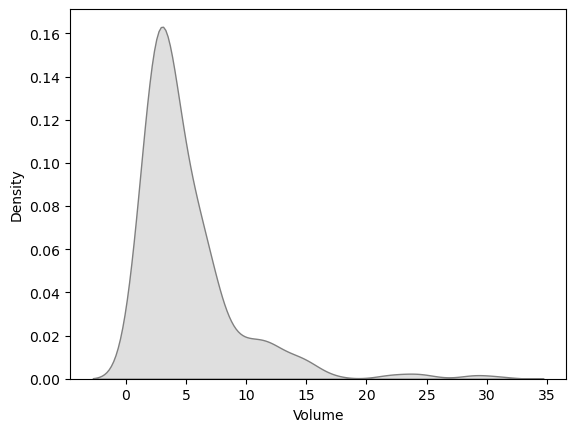

In [18]:
sns.kdeplot(data = df, x="Volume", fill = True, color = 'grey')

<Axes: xlabel='Avg Price', ylabel='Count'>

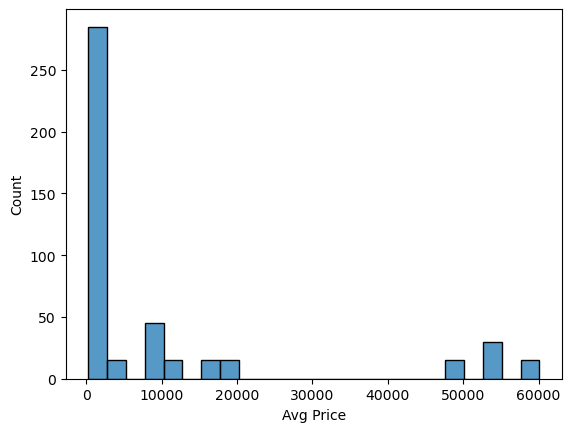

In [19]:
sns.histplot(data = df, x ='Avg Price')

<Axes: xlabel='Avg Price', ylabel='Count'>

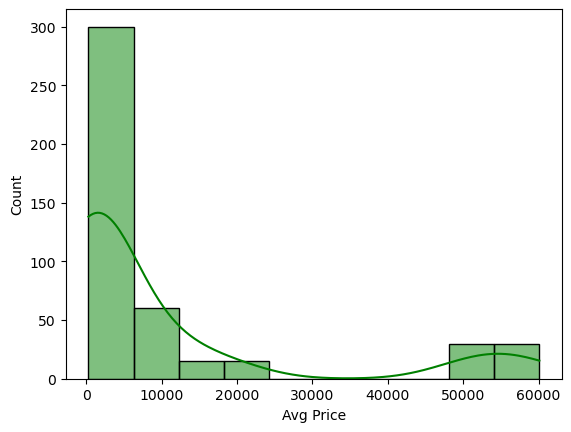

In [20]:
sns.histplot(data = df, x = 'Avg Price',bins = 10, color = 'green', kde = True)

### Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

In [38]:
num_cols = ['Volume', 'Avg Price', 'Total Sales Value',
            'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

In [40]:
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])

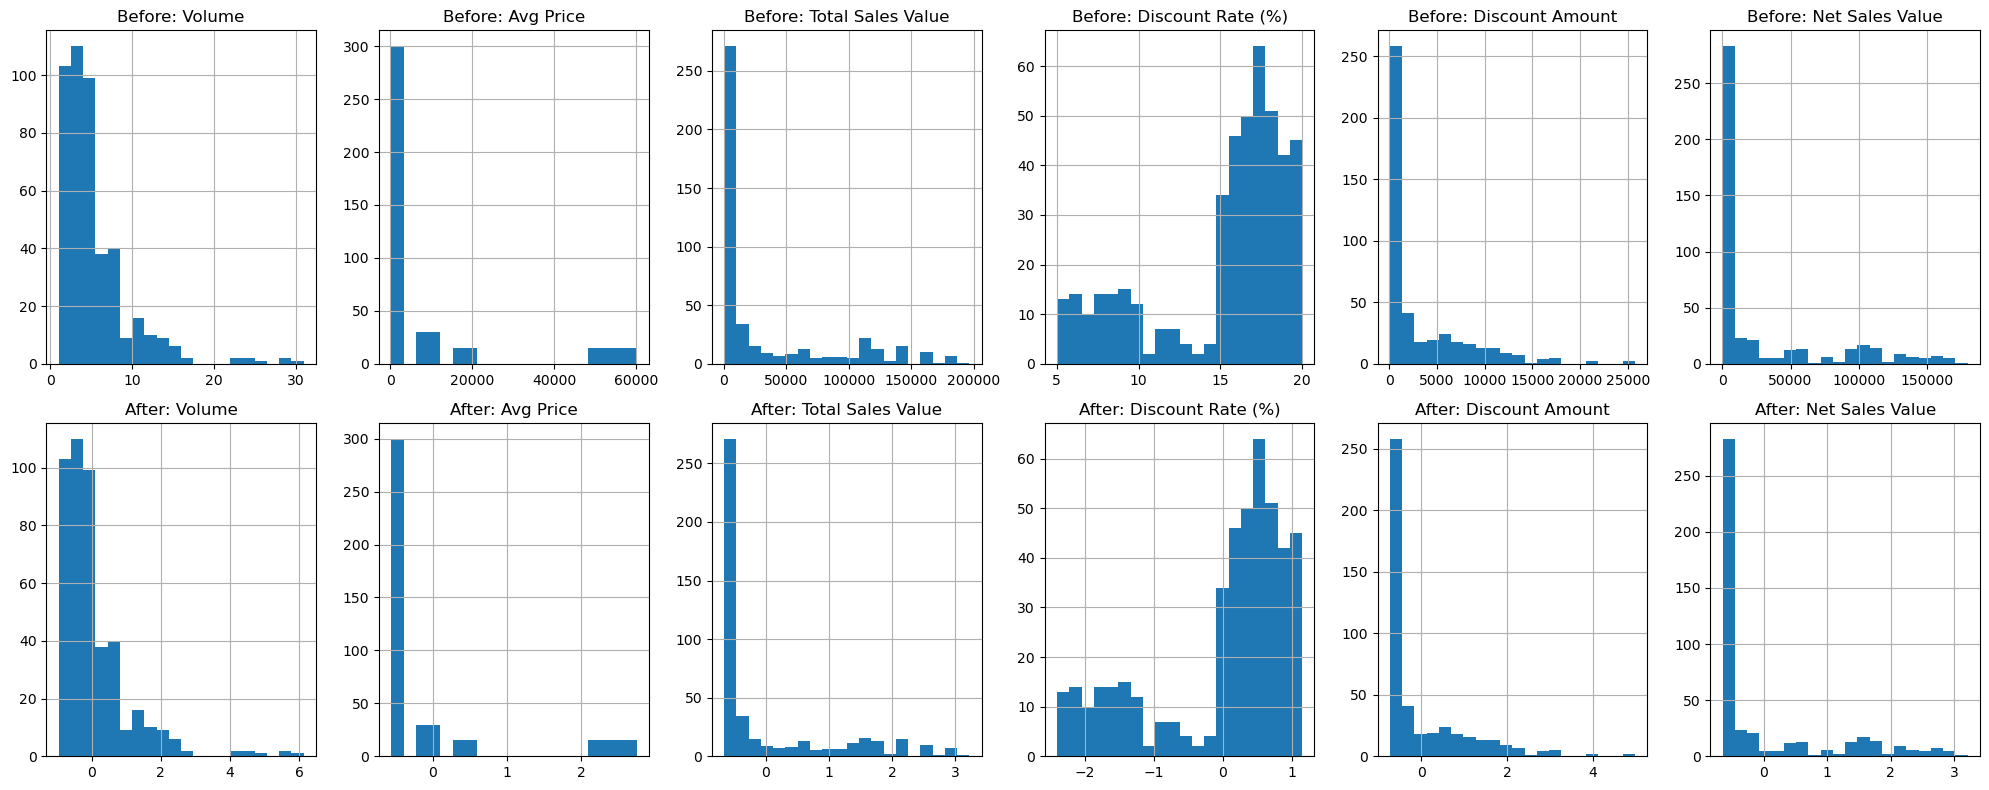

In [44]:
fig, axes = plt.subplots(2, len(num_cols), figsize=(20, 8))
for i, col in enumerate(num_cols):
    df[col].hist(ax=axes[0, i], bins=20)
    axes[0, i].set_title(f"Before: {col}")
    
    df_standardized[col].hist(ax=axes[1, i], bins=20)
    axes[1, i].set_title(f"After: {col}")

plt.tight_layout()
plt.show()

### Dummy Variables

In [47]:
cat_cols = ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [49]:
df_encoded = pd.get_dummies(df_standardized, columns=cat_cols, drop_first=True)

In [51]:
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
